In [27]:
import numpy as np
x= 2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)

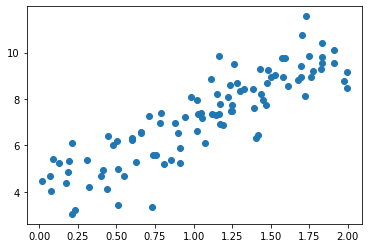

In [28]:
import matplotlib.pyplot as plt
plt.scatter(x,y)


<AxesSubplot:>

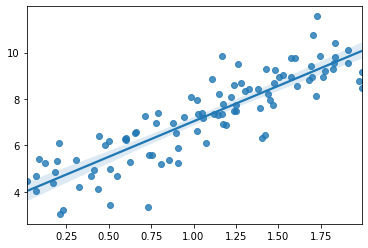

In [29]:
import seaborn as sns
sns.regplot(x=x, y=y)

In [30]:
x_b= np.c_[np.ones((100,1)),x]
theta=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta


array([[3.97717623],
       [3.05924609]])

In [31]:
x_new= np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new]
y_predict=x_new_b.dot(theta)
y_predict

array([[ 3.97717623],
       [10.09566842]])

(0.0, 2.0, 0.0, 15.0)

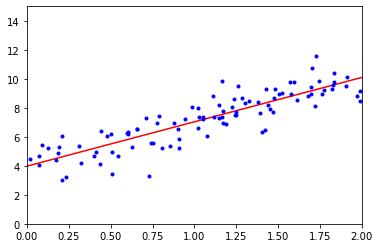

In [32]:
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(x_new)

array([[ 3.97717623],
       [10.09566842]])

In [34]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[3.97717623],
       [3.05924609]])

In [35]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[3.94725539],
       [3.10773098]])

In [36]:
from sklearn.linear_model import SGDRegressor
sgd= SGDRegressor(max_iter=1000, tol=1e-3, penalty =None, eta0=0.1 )
sgd.fit(x, y.ravel())
sgd.predict(x_new)

array([ 3.96002797, 10.1058228 ])

In [37]:
m=100
x= 6*np.random.rand(m,1)-3
y= 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
x_poly= poly_features.fit_transform(x)
print(x[1])
print(x_poly[1])

[-1.24021594]
[-1.24021594  1.53813557]


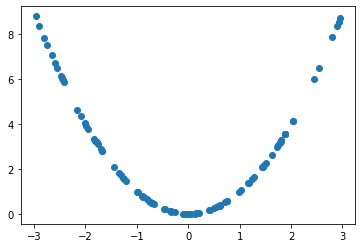

In [40]:
plt.scatter(x_poly[:,0],x_poly[:,1])

In [42]:
lin_reg.fit(x_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.90696361]), array([[0.94394472, 0.50668294]]))

In [49]:
#performing Ridge Regression on same data
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(x,y.ravel())
ridge_reg.predict([[1.5]])

array([4.4863163])

In [52]:
sgd= SGDRegressor(penalty='l1')
sgd.fit(x,y.ravel())
sgd.predict([[1.5]])

array([4.44520921])

In [51]:
#performing lasso regression
from sklearn.linear_model import Lasso
lasso_reg =Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([4.42803442])

In [53]:
#elastic net using scikit learn
from sklearn.linear_model import ElasticNet
elastic_reg= ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_reg.fit(x,y.ravel())
elastic_reg.predict([[1.5]])

array([4.43375035])

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [56]:
from copy import deepcopy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
std_scaler= StandardScaler()

In [60]:
poly_scaler= Pipeline([
                      ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                      ("std_scaler", StandardScaler())
])
x_train_poly_scaled=poly_scaler.fit_transform(x_train)
x_val_poly_scaled= poly_scaler.transform(x_test)

sgd_reg= SGDRegressor(max_iter=1, tol= -np.infty, penalty=None, warm_start=True,
                     learning_rate="constant",eta0=0.0005)
minimum_val_error= float("inf")
best_epoch= None
best_model= None

for epoch in range(1000):
    sgd_reg.fit(x_train_poly_scaled, y_train.ravel())
    y_val_predict= sgd_reg.predict(x_val_poly_scaled)
    val_error= mean_squared_error(y_val_predict, y_test)
    if val_error< minimum_val_error:
        minimum_val_error= val_error
        best_epoch= epoch
        best_model= deepcopy(sgd_reg)

In [64]:
from sklearn.datasets import load_iris
iris= load_iris()

In [68]:
list(iris.keys())
X= iris["data"][:,3:]
y=(iris["target"]==2).astype(np.int)

In [70]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [74]:
x_new= np.linspace(0,3,1000).reshape(-1,1)
print(x_new.shape)
y_proba= log_reg.predict(x_new)
print(y_proba.shape)
#plt.plot(x_new, y_proba[:,1],"g-", label="IrisVerginica")
#plt.plot(x_new, y_proba[:,0],"b--", label=" Not Iris Virginica")

(1000, 1)
(1000,)
